In [188]:
from pyspark.sql import SparkSession

spark = (SparkSession.builder.appName("Capstone")\
         .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
         .enableHiveSupport().getOrCreate())

In [189]:
spark

In [190]:
#d_Department_Employees                                                                                                                         
#d_Department_Managers                                                                                                                           
#d_Departments                                                                                                                          
#d_Employees                                                                                                                                   
#d_Salaries                                                                                                                               
#d_Titles     

In [191]:
dept_m = spark.sql("select * from donaalab.d_department_managers")

In [192]:
dept_m.show()

+-------+------+
|dept_no|emp_no|
+-------+------+
|   d001|110022|
|   d001|110039|
|   d002|110085|
|   d002|110114|
|   d003|110183|
|   d003|110228|
|   d004|110303|
|   d004|110344|
|   d004|110386|
|   d004|110420|
|   d005|110511|
|   d005|110567|
|   d006|110725|
|   d006|110765|
|   d006|110800|
|   d006|110854|
|   d007|111035|
|   d007|111133|
|   d008|111400|
|   d008|111534|
+-------+------+
only showing top 20 rows



In [193]:
dept_emp = spark.sql("select * from donaalab.d_department_employees")

In [194]:
dept_emp.show()

+------+-------+
|emp_no|dept_no|
+------+-------+
| 10001|   d005|
| 10002|   d007|
| 10003|   d004|
| 10004|   d004|
| 10005|   d003|
| 10006|   d005|
| 10007|   d008|
| 10008|   d005|
| 10009|   d006|
| 10010|   d004|
| 10010|   d006|
| 10011|   d009|
| 10012|   d005|
| 10013|   d003|
| 10014|   d005|
| 10015|   d008|
| 10016|   d007|
| 10017|   d001|
| 10018|   d004|
| 10018|   d005|
+------+-------+
only showing top 20 rows



In [195]:
depts = spark.sql("select * from donaalab.d_departments")

In [196]:
depts.show()

+-------+--------------------+
|dept_no|           dept_name|
+-------+--------------------+
|   d001|         "Marketing"|
|   d002|           "Finance"|
|   d003|   "Human Resources"|
|   d004|        "Production"|
|   d005|       "development"|
|   d006|"Quality Management"|
|   d007|             "Sales"|
|   d008|          "Research"|
|   d009|  "Customer Service"|
+-------+--------------------+



In [197]:
emps = spark.sql("select * from donaalab.d_employees")

In [198]:
emps.show()

+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
|emp_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|last_performance_rating|left1| last_date|
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
only showing top 20 rows



In [199]:
sal = spark.sql("select * from donaalab.d_salaries")

In [200]:
sal.show()

+------+------+
|emp_no|salary|
+------+------+
| 10001| 60117|
| 10002| 65828|
| 10003| 40006|
| 10004| 40054|
| 10005| 78228|
| 10006| 40000|
| 10007| 56724|
| 10008| 46671|
| 10009| 60929|
| 10010| 72488|
| 10011| 42365|
| 10012| 40000|
| 10013| 40000|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10020| 40000|
+------+------+
only showing top 20 rows



In [201]:
ti = spark.sql("select * from donaalab.d_titles")

In [202]:
ti.show()

+--------+------------------+
|title_id|             title|
+--------+------------------+
|   s0001|             Staff|
|   s0002|      Senior Staff|
|   e0001|Assistant Engineer|
|   e0002|          Engineer|
|   e0003|   Senior Engineer|
|   e0004|  Technique Leader|
|   m0001|           Manager|
+--------+------------------+



In [203]:
employee_date = spark.sql("""select * from donaalab.employee_date""")

In [204]:
employee_date.createOrReplaceTempView("empdate")

In [205]:
dept_m.createOrReplaceTempView("deptmand")

In [206]:
dept_emp.createOrReplaceTempView("deptempd")

In [207]:
depts.createOrReplaceTempView("deptsd")

In [208]:
emps.createOrReplaceTempView("employeesd")

In [209]:
sal.createOrReplaceTempView("salariesd")

In [210]:
ti.createOrReplaceTempView("titlesd")

# EDA

In [211]:
#1.A list showing employee number, last name, first name, sex, and salary for each employee

In [212]:
spark.sql("""select E.emp_no, E.last_name,E.first_name, E.sex, S.salary
FROM  employeesd E
JOIN salariesd S
ON E.emp_no = S.emp_no""").show()

+------+----------+----------+---+------+
|emp_no| last_name|first_name|sex|salary|
+------+----------+----------+---+------+
|473302|  Zallocco|  Hideyuki|  M| 40000|
|475053| Delgrande|     Byong|  F| 53422|
| 57444|      Babb|     Berry|  F| 48973|
|421786|  Verhoeff|     Xiong|  M| 40000|
|282238|   Baumann|Abdelkader|  F| 40000|
|263976|  Cusworth|      Eran|  M| 40000|
|273487|   Parfitt| Christoph|  M| 56087|
|461591|  Samarati|    Xudong|  M| 40000|
|477657| Magliocco|    Lihong|  M| 54816|
|219881|     Speek| Kwangyoen|  F| 40000|
| 29920|     Tyugu|   Shuichi|  F| 40000|
|208153|      Lunn|   Abdulah|  M| 50183|
| 13616|     Lorho|     Perry|  F| 40000|
|246449|Bultermann|     Subbu|  F| 87084|
| 21529|  Zallocco|     Bojan|  M| 40000|
| 17934|  Wuwongse|  Bilhanan|  M| 48795|
| 48085|      Gilg|Venkatesan|  M| 63016|
|239838|     Dulli|   Naftali|  M| 57715|
|240129|    Karnin|     Roddy|  M| 43548|
|205246|    Demizu|     Nevio|  F| 80252|
+------+----------+----------+---+

In [213]:
#2.A list showing first name, last name, and hire date for employees who were hired in 1986.

In [214]:
spark.sql("""select first_name, last_name, hire_date 
from empdate
where year(hire_date)=1986
order by hire_date""").show(2)

+----------+----------+----------+
|first_name| last_name| hire_date|
+----------+----------+----------+
|     Mohit|     Speek|1986-01-01|
|   Khatoun|Zeilberger|1986-01-01|
+----------+----------+----------+
only showing top 2 rows



In [215]:
#3.A list showing the manager of each department with the following information: department number, department name,the manager's employee number, last name, first name.

In [216]:
spark.sql("""select D.dept_no, D.dept_name,DM.emp_no, E.first_name, E.last_name
FROM deptsd D
JOIN deptmand DM
ON D.dept_no =DM.dept_no
JOIN employeesd E
ON DM.emp_no = E.emp_no
""").show()

+-------+--------------------+------+-----------+------------+
|dept_no|           dept_name|emp_no| first_name|   last_name|
+-------+--------------------+------+-----------+------------+
|   d009|  "Customer Service"|111877|    Xiaobin|    Spinelli|
|   d008|          "Research"|111534|     Hilary|      Kambil|
|   d006|"Quality Management"|110765|     Rutger|     Hofmeyr|
|   d004|        "Production"|110420|      Oscar|    Ghazalie|
|   d006|"Quality Management"|110725|  Peternela|     Onuegbe|
|   d001|         "Marketing"|110022|  Margareta|  Markovitch|
|   d007|             "Sales"|111035|Przemyslawa|   Kaelbling|
|   d005|       "development"|110511|   DeForest|    Hagimont|
|   d005|       "development"|110567|       Leon|    DasSarma|
|   d003|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   d009|  "Customer Service"|111939|    Yuchang|     Weedman|
|   d002|           "Finance"|110114|      Isamu|  Legleitner|
|   d006|"Quality Management"|110854|       Dung|      

In [217]:
#4.A list showing the department of each employee with the following information: employee number, last name, first name, and department name.

In [218]:
spark.sql("""select DE.emp_no, E.last_name, E.first_name, D.dept_name
from deptempd DE
join employeesd E
on DE.emp_no = E.emp_no
join deptsd D
on DE.dept_no = D.dept_no""").show()

+------+----------+----------+--------------------+
|emp_no| last_name|first_name|           dept_name|
+------+----------+----------+--------------------+
|473302|  Zallocco|  Hideyuki|           "Finance"|
|475053| Delgrande|     Byong|        "Production"|
| 57444|      Babb|     Berry|        "Production"|
|421786|  Verhoeff|     Xiong|   "Human Resources"|
|282238|   Baumann|Abdelkader|"Quality Management"|
|263976|  Cusworth|      Eran|"Quality Management"|
|273487|   Parfitt| Christoph|   "Human Resources"|
|461591|  Samarati|    Xudong|           "Finance"|
|477657| Magliocco|    Lihong|"Quality Management"|
|219881|     Speek| Kwangyoen|  "Customer Service"|
| 29920|     Tyugu|   Shuichi|        "Production"|
|208153|      Lunn|   Abdulah|       "development"|
| 13616|     Lorho|     Perry|          "Research"|
| 13616|     Lorho|     Perry|       "development"|
|246449|Bultermann|     Subbu|             "Sales"|
| 21529|  Zallocco|     Bojan|       "development"|
| 17934|  Wu

In [219]:
#5.A list showing first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B.“

In [220]:
spark.sql("""select first_name, last_name, sex
from employeesd
where first_name = 'Hercules' and  last_name Like 'B%'
""").show()

+----------+-------------+---+
|first_name|    last_name|sex|
+----------+-------------+---+
|  Hercules|         Baer|  M|
|  Hercules|        Biron|  F|
|  Hercules|        Birge|  F|
|  Hercules|      Berstel|  F|
|  Hercules|    Bernatsky|  M|
|  Hercules|         Bail|  F|
|  Hercules|       Bodoff|  M|
|  Hercules|     Benantar|  F|
|  Hercules|      Basagni|  M|
|  Hercules|Bernardinello|  F|
|  Hercules|   Baranowski|  M|
|  Hercules|      Bisiani|  F|
|  Hercules|   Benzmuller|  M|
|  Hercules|         Bahr|  M|
|  Hercules|        Biran|  F|
|  Hercules|         Bain|  F|
|  Hercules|      Brendel|  F|
|  Hercules|      Buchter|  M|
|  Hercules|     Barreiro|  M|
|  Hercules|         Baak|  M|
+----------+-------------+---+



In [221]:
#6.A list showing all employees in the Sales department, including their employee number, last name, first name, and department name.

In [222]:
spark.sql("""select D.dept_name,E.last_name,E.first_name,D.dept_no
from deptempd DE
join employeesd E
on DE.emp_no = E.emp_no
join deptsd D
on DE.dept_no =D.dept_no
where D.dept_name = '"Sales"'
""").show()

+---------+-------------+----------+-------+
|dept_name|    last_name|first_name|dept_no|
+---------+-------------+----------+-------+
|  "Sales"|   Bultermann|     Subbu|   d007|
|  "Sales"|       Demizu|     Nevio|   d007|
|  "Sales"|       Asmuth|      Ziya|   d007|
|  "Sales"|    Yoshizawa|    Kellyn|   d007|
|  "Sales"|         Perl|   Elliott|   d007|
|  "Sales"|     Nollmann|       Gad|   d007|
|  "Sales"|     Verspoor|      Giap|   d007|
|  "Sales"|Beutelspacher|      Duro|   d007|
|  "Sales"|        Swick|  Harngdar|   d007|
|  "Sales"|       Covnot| Nectarios|   d007|
|  "Sales"|    Shimshoni|  Kazuhira|   d007|
|  "Sales"|    Naumovich|   Gilbert|   d007|
|  "Sales"|        Munke|    Reuven|   d007|
|  "Sales"|     Skafidas|     Tonny|   d007|
|  "Sales"|       Zaumen|    Parviz|   d007|
|  "Sales"|         Pews| Yechezkel|   d007|
|  "Sales"|      Domenig| Stabislas|   d007|
|  "Sales"|     Businaro|   Chikara|   d007|
|  "Sales"|       Vecchi|   Candido|   d007|
|  "Sales"

In [223]:
#7.A list showing all employees in the Sales and Development departments, including their employee number, last name,first name, and department name.

In [224]:
spark.sql("""select DE.emp_no, E.first_name,E.last_name,D.dept_name 
from deptempd DE
join employeesd E
on DE.emp_no = E.emp_no
join deptsd D
on DE.dept_no = D.dept_no
where D.dept_name = '"development"' 
or D.dept_name = '"sales"'
""").show()

+------+----------+---------+-------------+
|emp_no|first_name|last_name|    dept_name|
+------+----------+---------+-------------+
|208153|   Abdulah|     Lunn|"development"|
| 13616|     Perry|    Lorho|"development"|
| 21529|     Bojan| Zallocco|"development"|
| 17934|  Bilhanan| Wuwongse|"development"|
| 71530|Venkatesan| McAlpine|"development"|
|104639|    Theron|  Escriba|"development"|
|214555|   Nechama|    Copas|"development"|
| 35916|    Wonhee|   Talmon|"development"|
| 61583|      Ziva|   Vecchi|"development"|
|422587|     Mohit|    Speek|"development"|
| 48885|     Phuoc|Antonisse|"development"|
|244492|   Shaunak|   Pettit|"development"|
| 26941|    Shigeu| Masamoto|"development"|
|492723| Piyawadee|  Sanella|"development"|
|425023|   Shaowen|    Krone|"development"|
|411614|   Martins| Wynblatt|"development"|
|103676|  Karoline|   Matzov|"development"|
| 93916|   Rosalie| Rousseau|"development"|
|430653|    Masoud|    Peroz|"development"|
|222134|  Qunsheng|    Speer|"de

In [225]:
#8.A list showing the frequency count of employee last names, in descending order. ( i.e., how many employees share each last name

In [226]:
spark.sql("""select last_name,
count(last_name) as Frequency
from employeesd
group by last_name
order by count(last_name) desc""").show()

+-----------+---------+
|  last_name|Frequency|
+-----------+---------+
|       Baba|      226|
|      Coorg|      223|
|     Gelosh|      223|
|     Farris|      222|
|    Sudbeck|      222|
|     Adachi|      221|
|     Osgood|      220|
|     Masada|      218|
|     Neiman|      218|
|    Mandell|      218|
|Boudaillier|      217|
|    Wendorf|      217|
|     Pettis|      216|
|     Mahnke|      216|
|    Solares|      216|
|   Cummings|      216|
|     Emmart|      215|
|   Birjandi|      215|
|   Collette|      215|
| Maksimenko|      215|
+-----------+---------+
only showing top 20 rows



In [227]:
import pandas as pd
import matplotlib.pyplot as plot

In [228]:
#9.Histogram to show the salary distribution among the employees

In [229]:
sal_dist = spark.sql("""select D.dept_name, count(E.emp_no) as No_of_Employees,sum(S.salary) as Total_Salary from deptsd D join deptempd DE on D.dept_no= DE.dept_no join employeesd E on DE.emp_no=E.emp_no join salariesd S on S.emp_no=E.emp_no group by dept_name""")


In [230]:
sal_dist.show()

+--------------------+---------------+------------+
|           dept_name|No_of_Employees|Total_Salary|
+--------------------+---------------+------------+
|"Quality Management"|          20117|   934555467|
|        "Production"|          73485|  3583161729|
|       "development"|          85707|  4173702462|
|          "Research"|          21126|  1032009108|
|             "Sales"|          52245|  3648379483|
|           "Finance"|          17346|  1032668378|
|   "Human Resources"|          17786|   794654412|
|         "Marketing"|          20211|  1234809182|
|  "Customer Service"|          23580|  1131808649|
+--------------------+---------------+------------+



In [231]:
sal_dist_d = sal_dist.toPandas()

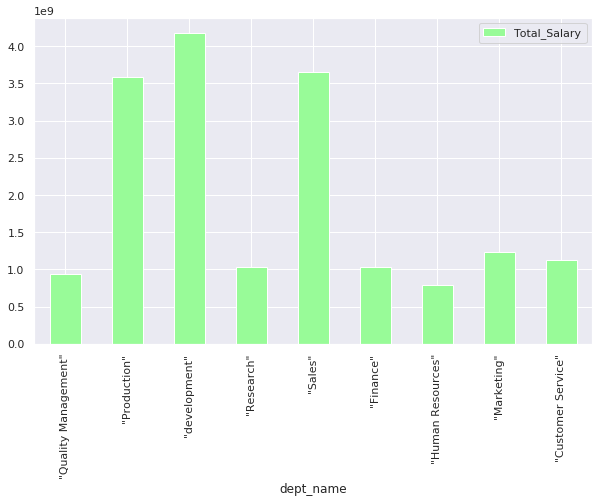

In [232]:
sal_dist_d.plot(kind ='bar', x='dept_name', y ='Total_Salary',color = "palegreen")

In [233]:
#10. Bar graph to show the Average salary per title (designation)

In [234]:
avg_sal_title = spark.sql("""SELECT title, avg(salary) as avg_Salary from titlesd T JOIN employeesd E on T.title_id = E.emp_title_id JOIN salariesd S on E.emp_no =  S.emp_no GROUP BY title""")


In [235]:
avg_sal_title.show()

+------------------+------------------+
|             title|        avg_Salary|
+------------------+------------------+
|             Staff| 58465.38285033152|
|Assistant Engineer| 48564.43444730077|
|      Senior Staff| 58550.17270435993|
|   Senior Engineer| 48506.79987109579|
|          Engineer|48535.336511426336|
|           Manager|51531.041666666664|
|  Technique Leader| 48582.89609189332|
+------------------+------------------+



In [236]:
avg_sal_title_d = avg_sal_title.toPandas()

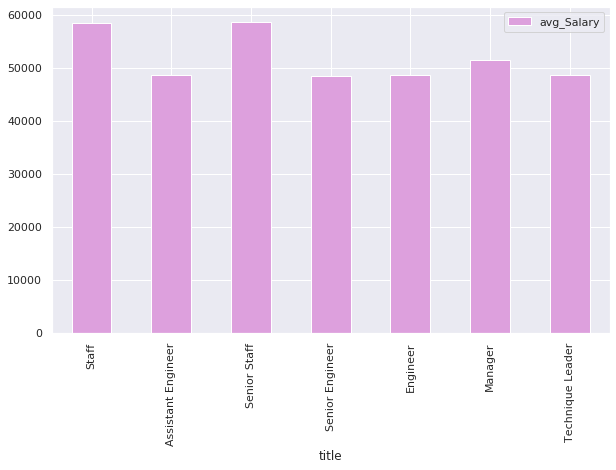

In [237]:
avg_sal_title_d.plot(kind ='bar', x='title', y ='avg_Salary',color = "plum")

In [238]:
#12. Perform your own Analysis (based on the data understanding) – At least 5 additional analysis

In [239]:
emps.show()

+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
|emp_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|last_performance_rating|left1| last_date|
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
|
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+
only showing top 20 rows



In [240]:
#1displaying the concatenated version of first name and last name of employees along with employee number,sex,hire date and last performance rating

In [241]:
emps_concat = spark.sql("""select concat(first_name," ",last_name) as emp_name,emp_no,sex,hire_date,last_performance_rating from employeesd """)

In [242]:
emps_concat.show()

+------------------+------+---+----------+-----------------------+
|          emp_name|emp_no|sex| hire_date|last_performance_rating|
+------------------+------+---+----------+-----------------------+
| Hideyuki Zallocco|473302|  M| 4/28/1990|                      A|
|   Byong Delgrande|475053|  F|  9/7/1991|                      C|
|        Berry Babb| 57444|  F| 3/21/1992|                      A|
|    Xiong Verhoeff|421786|  M|11/26/1987|                      C|
|Abdelkader Baumann|282238|  F| 1/18/1991|                      B|
|     Eran Cusworth|263976|  M|11/14/1986|                      B|
| Christoph Parfitt|273487|  M| 6/28/1991|                      A|
|   Xudong Samarati|461591|  M|11/13/1985|                      A|
|  Lihong Magliocco|477657|  M|10/23/1993|                      A|
|   Kwangyoen Speek|219881|  F| 2/14/1993|                      B|
|     Shuichi Tyugu| 29920|  F| 1/17/1995|                    PIP|
|      Abdulah Lunn|208153|  M|  4/8/1989|                    

In [243]:
#2listing te employee number,employee name and department name of each employee

In [245]:
emps_concat.createOrReplaceTempView("employeesnew")

In [246]:
spark.sql("""select DE.emp_no, EC.emp_name,D.dept_name 
from deptempd DE
join employeesd E
on DE.emp_no = E.emp_no
join deptsd D
on DE.dept_no = D.dept_no
join employeesnew EC
on E.emp_no=EC.emp_no
""").show()


+------+--------------------+--------------------+
|emp_no|            emp_name|           dept_name|
+------+--------------------+--------------------+
| 10001|      Georgi Facello|       "development"|
| 10002|      Bezalel Simmel|             "Sales"|
| 10003|       Parto Bamford|        "Production"|
| 10004|   Chirstian Koblick|        "Production"|
| 10005|    Kyoichi Maliniak|   "Human Resources"|
| 10006|      Anneke Preusig|       "development"|
| 10007|   Tzvetan Zielinski|          "Research"|
| 10008|     Saniya Kalloufi|       "development"|
| 10009|         Sumant Peac|"Quality Management"|
| 10010|  Duangkaew Piveteau|        "Production"|
| 10010|  Duangkaew Piveteau|"Quality Management"|
| 10011|          Mary Sluis|  "Customer Service"|
| 10012|  Patricio Bridgland|       "development"|
| 10013|    Eberhardt Terkki|   "Human Resources"|
| 10014|         Berni Genin|       "development"|
| 10015|  Guoxiang Nooteboom|          "Research"|
| 10016|Kazuhito Cappelletti|  

In [247]:
#3listing total number of employees in each department

In [248]:
spark.sql("""select D.dept_name,
count(DE.emp_no) as no_of_employees
from deptempd DE
join deptsd D
on D.dept_no = DE.dept_no
group by D.dept_name""").show()

+--------------------+---------------+
|           dept_name|no_of_employees|
+--------------------+---------------+
|"Quality Management"|          20117|
|        "Production"|          73485|
|       "development"|          85707|
|          "Research"|          21126|
|             "Sales"|          52245|
|           "Finance"|          17346|
|   "Human Resources"|          17786|
|         "Marketing"|          20211|
|  "Customer Service"|          23580|
+--------------------+---------------+



In [249]:
#4.displaying the employee name,employee number and salary of each employee

In [250]:
emps_concat.show()

+------------------+------+---+----------+-----------------------+
|          emp_name|emp_no|sex| hire_date|last_performance_rating|
+------------------+------+---+----------+-----------------------+
| Hideyuki Zallocco|473302|  M| 4/28/1990|                      A|
|   Byong Delgrande|475053|  F|  9/7/1991|                      C|
|        Berry Babb| 57444|  F| 3/21/1992|                      A|
|    Xiong Verhoeff|421786|  M|11/26/1987|                      C|
|Abdelkader Baumann|282238|  F| 1/18/1991|                      B|
|     Eran Cusworth|263976|  M|11/14/1986|                      B|
| Christoph Parfitt|273487|  M| 6/28/1991|                      A|
|   Xudong Samarati|461591|  M|11/13/1985|                      A|
|  Lihong Magliocco|477657|  M|10/23/1993|                      A|
|   Kwangyoen Speek|219881|  F| 2/14/1993|                      B|
|     Shuichi Tyugu| 29920|  F| 1/17/1995|                    PIP|
|      Abdulah Lunn|208153|  M|  4/8/1989|                    

In [251]:
spark.sql("""select EC.emp_no, EC.emp_name,S.salary
from employeesnew EC
join salariesd S
on S.emp_no = EC.emp_no
""").show()


+------+------------------+------+
|emp_no|          emp_name|salary|
+------+------------------+------+
|473302| Hideyuki Zallocco| 40000|
|475053|   Byong Delgrande| 53422|
| 57444|        Berry Babb| 48973|
|421786|    Xiong Verhoeff| 40000|
|282238|Abdelkader Baumann| 40000|
|263976|     Eran Cusworth| 40000|
|273487| Christoph Parfitt| 56087|
|461591|   Xudong Samarati| 40000|
|477657|  Lihong Magliocco| 54816|
|219881|   Kwangyoen Speek| 40000|
| 29920|     Shuichi Tyugu| 40000|
|208153|      Abdulah Lunn| 50183|
| 13616|       Perry Lorho| 40000|
|246449|  Subbu Bultermann| 87084|
| 21529|    Bojan Zallocco| 40000|
| 17934| Bilhanan Wuwongse| 48795|
| 48085|   Venkatesan Gilg| 63016|
|239838|     Naftali Dulli| 57715|
|240129|      Roddy Karnin| 43548|
|205246|      Nevio Demizu| 80252|
+------+------------------+------+
only showing top 20 rows



In [252]:
#5.listing the number of male and female employees in each department

In [253]:
spark.sql("""select D.dept_name,E.sex,count(E.sex) as count_of_male_female
from employeesd E
join deptempd DE
on E.emp_no = DE.emp_no
join deptsd D
on D.dept_no = DE.dept_no
group by D.dept_name,E.sex
""").show()

+--------------------+---+--------------------+
|           dept_name|sex|count_of_male_female|
+--------------------+---+--------------------+
|"Quality Management"|  F|                8078|
|         "Marketing"|  F|                8037|
|           "Finance"|  F|                7015|
|             "Sales"|  M|               31391|
|       "development"|  F|               34258|
|        "Production"|  F|               29549|
|  "Customer Service"|  M|               14132|
|        "Production"|  M|               43936|
|             "Sales"|  F|               20854|
|"Quality Management"|  M|               12039|
|          "Research"|  F|                8439|
|           "Finance"|  M|               10331|
|  "Customer Service"|  F|                9448|
|   "Human Resources"|  F|                7075|
|          "Research"|  M|               12687|
|       "development"|  M|               51449|
|   "Human Resources"|  M|               10711|
|         "Marketing"|  M|              

# Modelling

In [254]:
#joining all the 6 tables

In [255]:
data = emps.join(dept_emp,on = 'emp_no', how = 'left') \
        .join(depts, on='dept_no',how = 'left') \
        .join(sal, on ='emp_no', how = 'left') \
        .join(ti, emps.emp_title_id == ti.title_id, 'left')

In [256]:
data.show()

+------+-------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+--------------------+------+--------+----------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|last_performance_rating|left1| last_date|           dept_name|salary|title_id|           title|
+------+-------+------------+----------+----------+----------+---+----------+--------------+-----------------------+-----+----------+--------------------+------+--------+----------------+
|           "Finance"| 40000|   s0001|           Staff|
|        "Production"| 53422|   e0002|        Engineer|
|        "Production"| 48973|   e0002|        Engineer|
|   "Human Resources"| 40000|   s0001|           Staff|
|"Quality Management"| 40000|   e0003| Senior Engineer|
|"Quality Management"| 40000|   e0003| Senior Engineer|
|   "Human Resources"| 56087|   s0001|           Staff|
|           "Finance"| 40000|   s0002|    Se

In [257]:
data.cache()

DataFrame[emp_no: int, dept_no: string, emp_title_id: string, birth_date: string, first_name: string, last_name: string, sex: string, hire_date: string, no_of_projects: int, last_performance_rating: string, left1: int, last_date: string, dept_name: string, salary: bigint, title_id: string, title: string]

In [258]:
data.show(5)

+------+-------+------------+----------+----------+---------+---+----------+--------------+-----------------------+-----+---------+--------------------+------+--------+---------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left1|last_date|           dept_name|salary|title_id|          title|
+------+-------+------------+----------+----------+---------+---+----------+--------------+-----------------------+-----+---------+--------------------+------+--------+---------------+
|           "Finance"| 40000|   s0001|          Staff|
|        "Production"| 53422|   e0002|       Engineer|
|        "Production"| 48973|   e0002|       Engineer|
|   "Human Resources"| 40000|   s0001|          Staff|
|"Quality Management"| 40000|   e0003|Senior Engineer|
+------+-------+------------+----------+----------+---------+---+----------+--------------+-----------------------+-----+---------+--------------------+------+--------+--

In [259]:
data.count()

331603

In [260]:
data.columns

['emp_no',
 'dept_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'no_of_projects',
 'last_performance_rating',
 'left1',
 'last_date',
 'dept_name',
 'salary',
 'title_id',
 'title']

In [261]:
data.dtypes

[('emp_no', 'int'),
 ('dept_no', 'string'),
 ('emp_title_id', 'string'),
 ('birth_date', 'string'),
 ('first_name', 'string'),
 ('last_name', 'string'),
 ('sex', 'string'),
 ('hire_date', 'string'),
 ('no_of_projects', 'int'),
 ('last_performance_rating', 'string'),
 ('left1', 'int'),
 ('last_date', 'string'),
 ('dept_name', 'string'),
 ('salary', 'bigint'),
 ('title_id', 'string'),
 ('title', 'string')]

In [262]:
data.describe().show()

+-------+------------------+-------+------------+----------+----------+---------+------+---------+------------------+-----------------------+-------------------+---------+------------------+------------------+--------+------------------+
|summary|            emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|   sex|hire_date|    no_of_projects|last_performance_rating|              left1|last_date|         dept_name|            salary|title_id|             title|
+-------+------------------+-------+------------+----------+----------+---------+------+---------+------------------+-----------------------+-------------------+---------+------------------+------------------+--------+------------------+
|  count|            331603| 331603|      331603|    331603|    331603|   331603|331603|   331603|            331603|                 331603|             331603|   331603|            331603|            331603|  331603|            331603|
|   mean|253332.60502468314|   null|        null

In [263]:
#Plotting distribution
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [264]:
data_pd = data.select('salary').toPandas()

In [265]:
data_pd.head()

,salary
0,40000
1,53422
2,48973
3,40000
4,40000


In [266]:
import pandas as pd

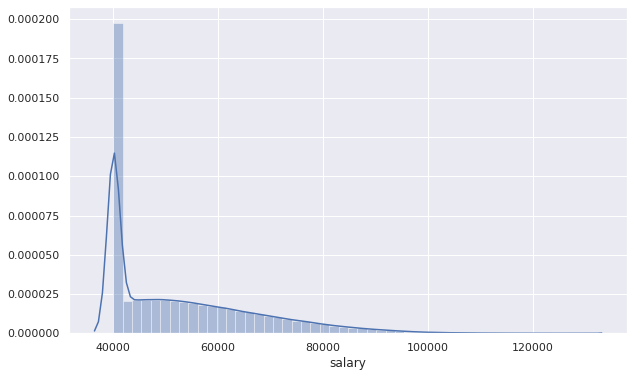

In [267]:
#Density Plot of salary
sn.set(rc={"figure.figsize": (10, 6)})
sn.distplot(pd.to_numeric(data_pd['salary']), norm_hist=True)

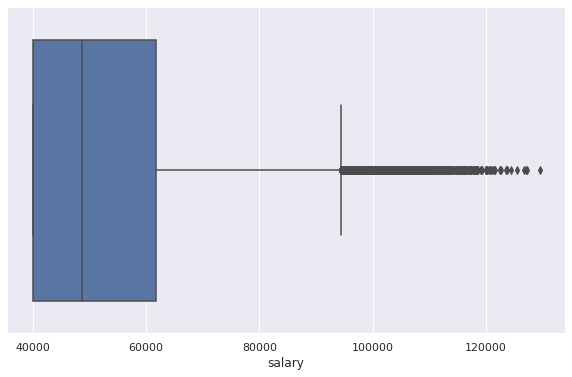

In [268]:
#Boxplot
sn.boxplot(x= pd.to_numeric(data_pd['salary']))

In [269]:
#check for null values
from pyspark.sql.functions import isnan, when, count, col
data.select([count(when(col(c).isNull(), c)).alias(c) for c in data.columns]).toPandas().transpose()

,0
emp_no,0
dept_no,0
emp_title_id,0
birth_date,0
first_name,0
last_name,0
sex,0
hire_date,0
no_of_projects,0
last_performance_rating,0


In [270]:
numeric_features = [t[0] for t in data.dtypes if t[1] == 'int' or t[1] == 'double']
numeric_features

['emp_no', 'no_of_projects', 'left1']

In [271]:
data.select(numeric_features).toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,331593,331594,331595,331596,331597,331598,331599,331600,331601,331602
emp_no,473302,475053,57444,421786,282238,263976,273487,461591,477657,219881,...,99439,225587,229498,229498,464231,255832,76671,264920,264920,464503
no_of_projects,2,1,9,2,6,8,10,2,5,6,...,10,5,4,4,9,10,8,1,1,8
left1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
categorical_features = [t[0] for t in data.dtypes if t[1] == 'string']
categorical_features

['dept_no',
 'emp_title_id',
 'birth_date',
 'first_name',
 'last_name',
 'sex',
 'hire_date',
 'last_performance_rating',
 'last_date',
 'dept_name',
 'title_id',
 'title']

In [273]:
data.select(categorical_features).toPandas().transpose()

,0,1,2,3,4,5,6,7,8,9,...,331593,331594,331595,331596,331597,331598,331599,331600,331601,331602
dept_no,d002,d004,d004,d003,d006,d006,d003,d002,d006,d009,...,d007,d002,d008,d005,d007,d004,d007,d007,d002,d008
emp_title_id,s0001,e0002,e0002,s0001,e0003,e0003,s0001,s0002,e0002,s0002,...,s0001,s0002,e0002,e0002,s0001,e0002,s0001,s0001,s0001,s0002
birth_date,7/25/1953,11/18/1954,1/30/1958,9/28/1957,10/28/1952,10/30/1959,4/14/1957,11/17/1964,12/18/1962,4/24/1956,...,2/2/1963,8/5/1952,12/6/1952,12/6/1952,8/14/1958,5/8/1955,6/9/1959,9/22/1959,9/22/1959,5/31/1964
first_name,Hideyuki,Byong,Berry,Xiong,Abdelkader,Eran,Christoph,Xudong,Lihong,Kwangyoen,...,Mahmut,Chenyi,Jagoda,Jagoda,Constantino,Yuping,Ortrud,Percy,Percy,Arvind
last_name,Zallocco,Delgrande,Babb,Verhoeff,Baumann,Cusworth,Parfitt,Samarati,Magliocco,Speek,...,Manders,Orlowska,Molberg,Molberg,Eastman,Dayang,Plessier,Samarati,Samarati,Slobodova
sex,M,F,F,M,F,M,M,M,M,F,...,M,M,F,F,M,F,M,F,F,M
hire_date,4/28/1990,9/7/1991,3/21/1992,11/26/1987,1/18/1991,11/14/1986,6/28/1991,11/13/1985,10/23/1993,2/14/1993,...,9/26/1985,12/25/1986,1/2/1987,1/2/1987,10/28/1988,2/26/1995,2/24/1988,9/8/1994,9/8/1994,11/23/1987
last_performance_rating,A,C,A,C,B,B,A,A,A,B,...,A,A,C,C,C,A,B,B,B,C
last_date,\r,\r,\r,\r,\r,8/21/1993\r,\r,8/21/1994\r,\r,\r,...,\r,\r,\r,\r,\r,\r,\r,\r,\r,\r
dept_name,"""Finance""","""Production""","""Production""","""Human Resources""","""Quality Management""","""Quality Management""","""Human Resources""","""Finance""","""Quality Management""","""Customer Service""",...,"""Sales""","""Finance""","""Research""","""development""","""Sales""","""Production""","""Sales""","""Sales""","""Finance""","""Research"""


In [274]:
data_new = data.drop('birth_date','hire_date','last_date','title_id','emp_title_id','dept_name','first_name','last_name')

In [275]:
data_new.show()

+------+-------+---+--------------+-----------------------+-----+------+----------------+
|emp_no|dept_no|sex|no_of_projects|last_performance_rating|left1|salary|           title|
+------+-------+---+--------------+-----------------------+-----+------+----------------+
|473302|   d002|  M|             2|                      A|    0| 40000|           Staff|
|475053|   d004|  F|             1|                      C|    0| 53422|        Engineer|
| 57444|   d004|  F|             9|                      A|    0| 48973|        Engineer|
|421786|   d003|  M|             2|                      C|    0| 40000|           Staff|
|282238|   d006|  F|             6|                      B|    0| 40000| Senior Engineer|
|263976|   d006|  M|             8|                      B|    1| 40000| Senior Engineer|
|273487|   d003|  M|            10|                      A|    0| 56087|           Staff|
|461591|   d002|  M|             2|                      A|    1| 40000|    Senior Staff|
|477657|  

In [276]:
data_new.columns

['emp_no',
 'dept_no',
 'sex',
 'no_of_projects',
 'last_performance_rating',
 'left1',
 'salary',
 'title']

In [277]:
categorical_features1 = [t[0] for t in data_new.dtypes if t[1] == 'string']
categorical_features1

['dept_no', 'sex', 'last_performance_rating', 'title']

In [278]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [279]:
# create object of StringIndexer class and specify input and output column
SI_dept_no = StringIndexer(inputCol='dept_no',outputCol='dept_no_Index')
SI_sex = StringIndexer(inputCol='sex',outputCol='sex_Index')
SI_last_performance_rating = StringIndexer(inputCol='last_performance_rating',outputCol='last_performance_rating_Index')
SI_title=StringIndexer(inputCol='title',outputCol='title_Index')

# transform the data
data_new = SI_dept_no.fit(data_new).transform(data_new)
data_new = SI_sex.fit(data_new).transform(data_new)
data_new = SI_last_performance_rating.fit(data_new).transform(data_new)
data_new = SI_title.fit(data_new).transform(data_new)


In [280]:
cat_f=['dept_no_Index','emp_title_id_Index','last_performance_rating_Index','dept_name_Index','title_Index','salary']

In [281]:
data_new.columns

['emp_no',
 'dept_no',
 'sex',
 'no_of_projects',
 'last_performance_rating',
 'left1',
 'salary',
 'title',
 'dept_no_Index',
 'sex_Index',
 'last_performance_rating_Index',
 'title_Index']

In [282]:
# create object and specify input and output column
#OHE = OneHotEncoder(inputCols=['dept_no_Index','emp_title_id_Index','first_name_Index','last_name_Index','sex_Index','last_performance_rating_Index','dept_name_Index','title_Index'],outputCols=['Manufacturer_vec', 'Model_vec'])

encoder=OneHotEncoder(inputCol='dept_no_Index',outputCol="dept_no_Index_V")
data_new = encoder.transform(data_new)

In [283]:
encoder=OneHotEncoder(inputCol='sex_Index',outputCol='sex_Index_V')
data_new = encoder.transform(data_new)

In [284]:
encoder=OneHotEncoder(inputCol='last_performance_rating_Index',outputCol='last_performance_rating_Index_V')
data_new = encoder.transform(data_new)

In [285]:
encoder=OneHotEncoder(inputCol='title_Index',outputCol='title_Index_V')
data_new = encoder.transform(data_new)

In [286]:
featureCols = ['dept_no_Index_V',
 'sex_Index_V',
 'no_of_projects',
 'last_performance_rating_Index_V',
 'title_Index_V',
 'salary']

In [287]:
featureCols

['dept_no_Index_V',
 'sex_Index_V',
 'no_of_projects',
 'last_performance_rating_Index_V',
 'title_Index_V',
 'salary']

In [288]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [289]:
data_train_df = assembler.transform(data_new)

In [290]:
data_train_df.show( 10 , truncate=False)

+------+-------+---+--------------+-----------------------+-----+------+---------------+-------------+---------+-----------------------------+-----------+---------------+-------------+-------------------------------+-------------+----------------------------------------------------+
|emp_no|dept_no|sex|no_of_projects|last_performance_rating|left1|salary|title          |dept_no_Index|sex_Index|last_performance_rating_Index|title_Index|dept_no_Index_V|sex_Index_V  |last_performance_rating_Index_V|title_Index_V|features                                            |
+------+-------+---+--------------+-----------------------+-----+------+---------------+-------------+---------+-----------------------------+-----------+---------------+-------------+-------------------------------+-------------+----------------------------------------------------+
|473302|d002   |M  |2             |A                      |0    |40000 |Staff          |8.0          |0.0      |1.0                          |0.0   

In [291]:
# Setting the target variables - left1
data_train_df = data_train_df.withColumn( "label", data_new.left1)

In [292]:
#Split the dataset
train_df, test_df = data_train_df.randomSplit( [0.7, 0.3], seed = 42 )

In [293]:
train_df.show(5, truncate=False)

+------+-------+---+--------------+-----------------------+-----+------+------------------+-------------+---------+-----------------------------+-----------+---------------+-------------+-------------------------------+-------------+---------------------------------------------------+-----+
|emp_no|dept_no|sex|no_of_projects|last_performance_rating|left1|salary|title             |dept_no_Index|sex_Index|last_performance_rating_Index|title_Index|dept_no_Index_V|sex_Index_V  |last_performance_rating_Index_V|title_Index_V|features                                           |label|
+------+-------+---+--------------+-----------------------+-----+------+------------------+-------------+---------+-----------------------------+-----------+---------------+-------------+-------------------------------+-------------+---------------------------------------------------+-----+
|10001 |d005   |M  |9             |C                      |1    |60117 |Senior Engineer   |0.0          |0.0      |2.0      

# Logistic Regression

In [294]:
#import the logistic regression 
from pyspark.ml.classification import LogisticRegression

In [295]:
#Apply the logistic regression model
log_reg=LogisticRegression(labelCol='left1').fit(train_df)

In [296]:
accuracy_train = train_results.filter(train_results.label == train_results.prediction).count() / float(train_results.count())
print("Accuracy_train : ",accuracy_train)

Accuracy_train :  0.900016337199804


In [297]:
#Predicting on test dataset
y_pred = log_reg.transform( test_df )
y_pred.select( 'features', 'label', 'prediction').show(50)

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(21,[2,9,10,14,20...|    0|       0.0|
|(21,[1,8,9,12,15,...|    0|       0.0|
|(21,[1,8,9,11,15,...|    0|       0.0|
|(21,[7,8,9,12,17,...|    0|       0.0|
|(21,[2,8,9,12,14,...|    0|       0.0|
|(21,[0,8,9,12,18,...|    0|       0.0|
|(21,[0,9,10,15,20...|    0|       0.0|
|(21,[0,8,9,10,16,...|    0|       0.0|
|(21,[1,9,12,15,20...|    0|       0.0|
|(21,[6,8,9,11,18,...|    0|       0.0|
|(21,[1,8,9,12,15,...|    1|       0.0|
|(21,[0,8,9,10,16,...|    0|       0.0|
|(21,[8,9,12,14,20...|    0|       0.0|
|(21,[1,8,9,11,15,...|    0|       0.0|
|(21,[5,8,9,11,14,...|    0|       0.0|
|(21,[9,12,17,20],...|    0|       0.0|
|(21,[3,8,9,11,14,...|    0|       0.0|
|(21,[1,9,11,15,20...|    0|       0.0|
|(21,[4,8,9,11,18,...|    0|       0.0|
|(21,[0,9,10,15,20...|    0|       0.0|
|(21,[0,9,11,16,20...|    0|       0.0|
|(21,[7,8,9,11,14,...|    0|       0.0|


In [298]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(y_pred))

Test Area Under ROC 0.5040987173246295


In [299]:
accuracy_test = y_pred.filter(y_pred.label == y_pred.prediction).count() / float(y_pred.count())
print("Accuracy_test : ",accuracy_test)

Accuracy_test :  0.9013686177465785


# Decision Tree Classifier

In [300]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_df)
predictions = dtModel.transform(test_df)
predictions.select('features', 'label', 'prediction', 'probability').show(50)

+--------------------+-----+----------+--------------------+
|            features|label|prediction|         probability|
+--------------------+-----+----------+--------------------+
|(21,[2,9,10,14,20...|    0|       0.0|[0.90001633719980...|
|(21,[1,8,9,12,15,...|    0|       0.0|[0.90001633719980...|
|(21,[1,8,9,11,15,...|    0|       0.0|[0.90001633719980...|
|(21,[7,8,9,12,17,...|    0|       0.0|[0.90001633719980...|
|(21,[2,8,9,12,14,...|    0|       0.0|[0.90001633719980...|
|(21,[0,8,9,12,18,...|    0|       0.0|[0.90001633719980...|
|(21,[0,9,10,15,20...|    0|       0.0|[0.90001633719980...|
|(21,[0,8,9,10,16,...|    0|       0.0|[0.90001633719980...|
|(21,[1,9,12,15,20...|    0|       0.0|[0.90001633719980...|
|(21,[6,8,9,11,18,...|    0|       0.0|[0.90001633719980...|
|(21,[1,8,9,12,15,...|    1|       0.0|[0.90001633719980...|
|(21,[0,8,9,10,16,...|    0|       0.0|[0.90001633719980...|
|(21,[8,9,12,14,20...|    0|       0.0|[0.90001633719980...|
|(21,[1,8,9,11,15,...|  

In [301]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.5


In [302]:
accuracy_test_dt = predictions.filter(predictions.label == predictions.prediction).count() / float(predictions.count())
print("Accuracy_test_dt : ",accuracy_test_dt)

Accuracy_test_dt :  0.9013686177465785
